<a href="https://colab.research.google.com/github/RoopamSeal/Diabetes-Prediction/blob/main/Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative Analysis: Pima Indians Diabetes **Prediction**

This project details a robust, end-to-end analysis on the Pima Indians Diabetes dataset, focusing heavily on correcting data flaws, simplifying complexity, and benchmarking advanced machine learning classifiers. The rigorous methodology was designed to create a reliable and interpretable screening tool for Type 2 Diabetes within this specific population, ensuring that the model is built upon a sound statistical and medical foundation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
missing = data.isnull().sum()
missing

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
duplicates = data.duplicated().sum()
duplicates

np.int64(0)

All invalid $0$ values across the medically critical columns were  replaced with the missing indicator, np.nan. This ensured that the machine learning algorithms treated them as genuinely unknown values.

The np.nan values in each column were then replaced by that column's median calculated from the valid, non-zero entries. The median was explicitly chosen over the mean because it is significantly more robust to outliers (e.g., extremely high glucose readings), thereby minimizing the distortion of the original feature distribution and maintaining the natural variance of the population data.

In [ ]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    data[col] = data[col].replace(0, np.nan)

for col in cols_to_replace:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

print("Updated Missing Value Counts (Should all be 0):")
print(data.isnull().sum())

Updated Missing Value Counts (Should all be 0):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


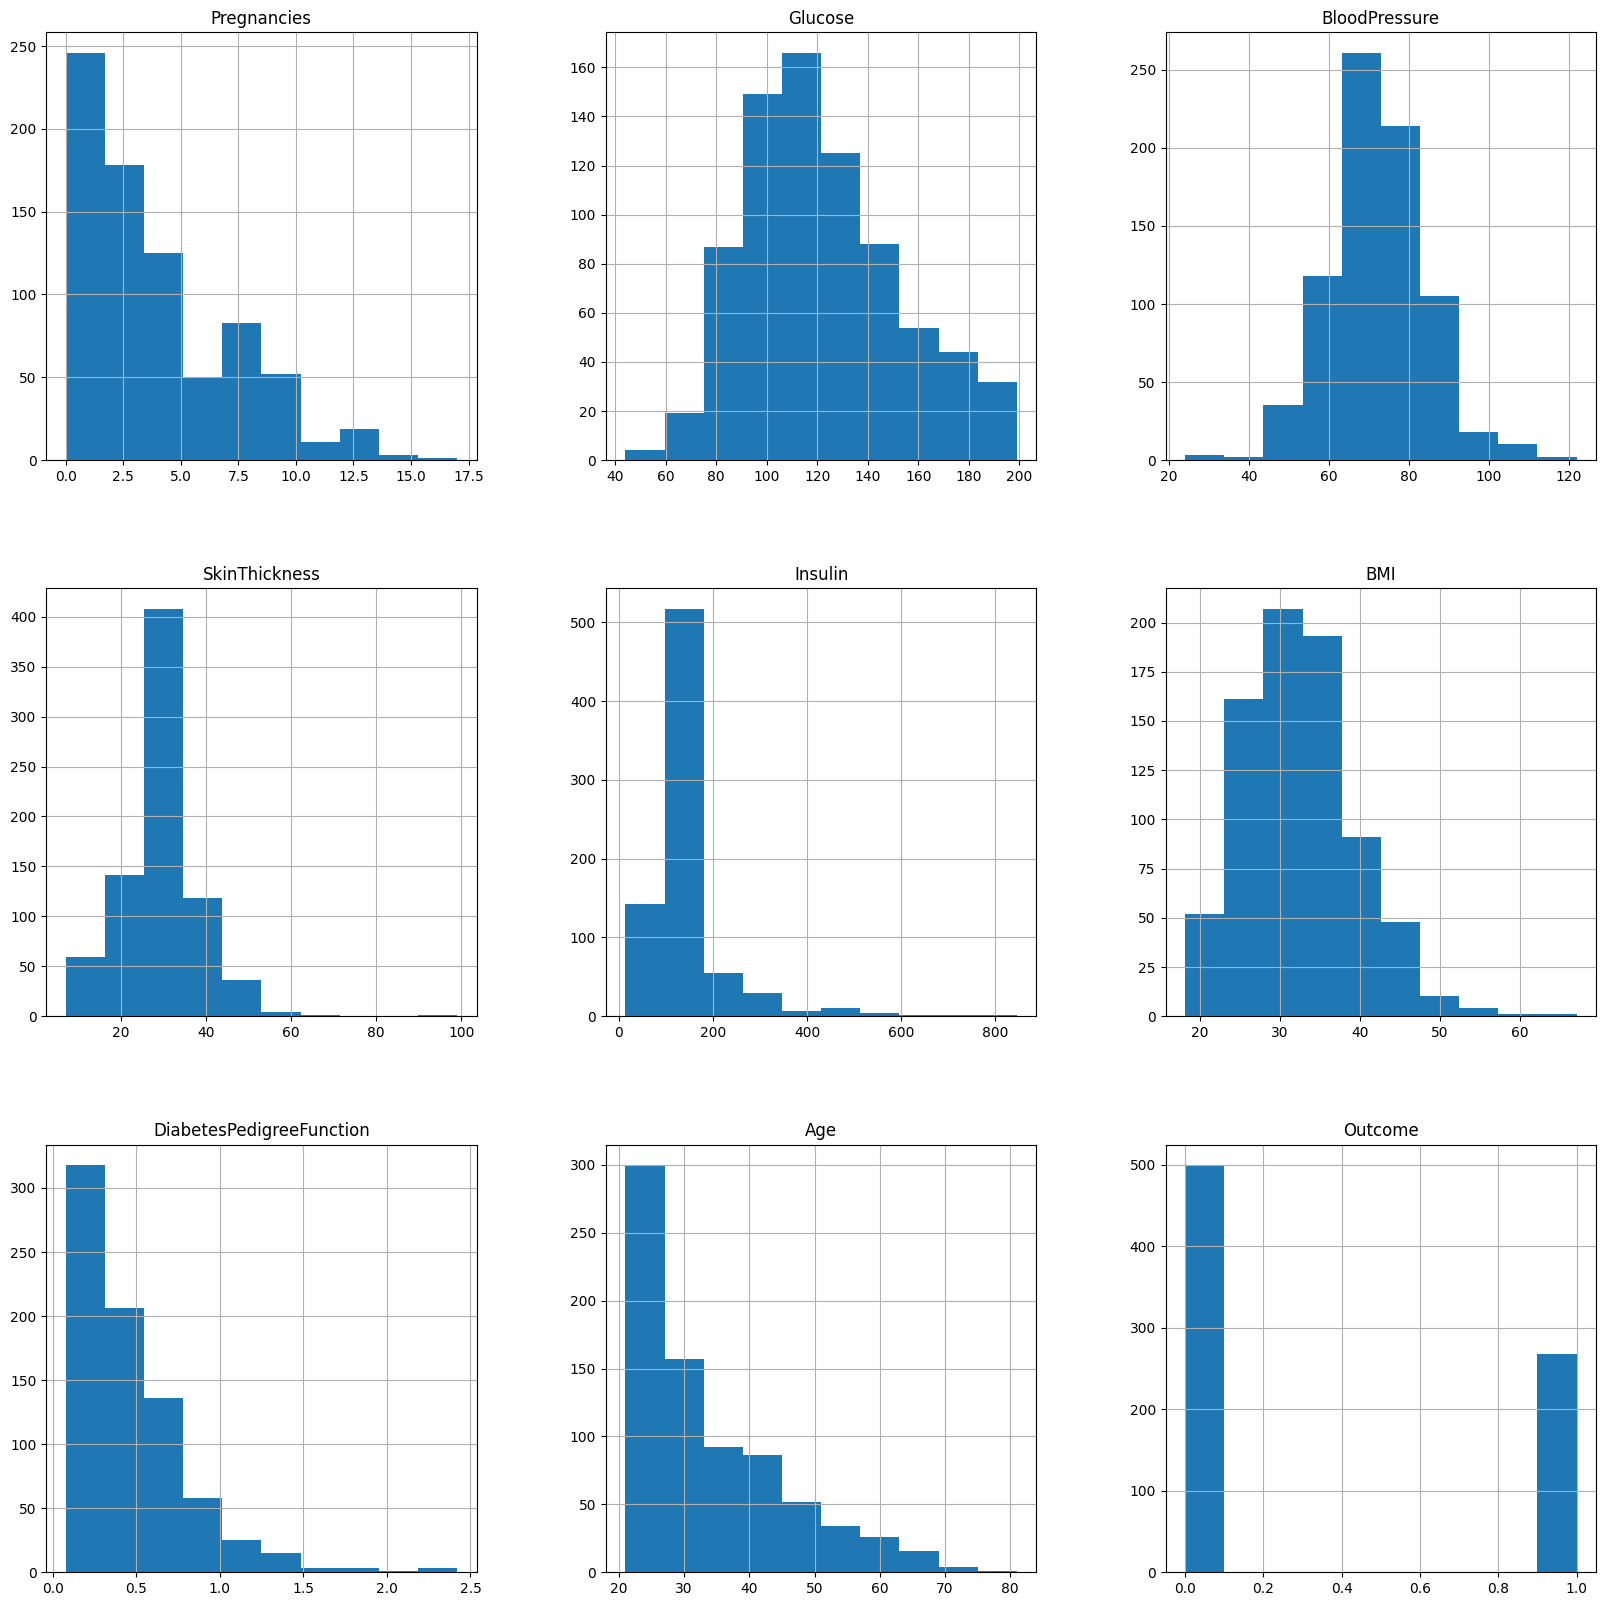

In [ ]:
p = data.hist(figsize=(20, 20))

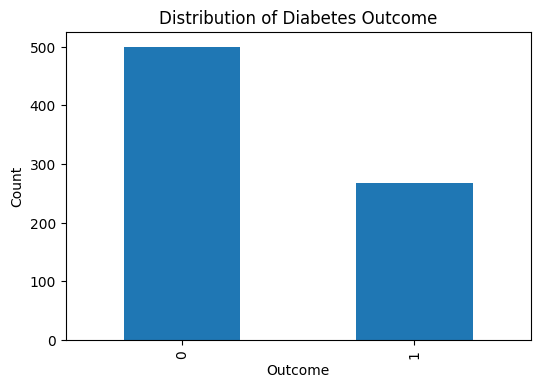

In [ ]:
import matplotlib.pyplot as plt
data["Outcome"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.savefig("Distribution.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

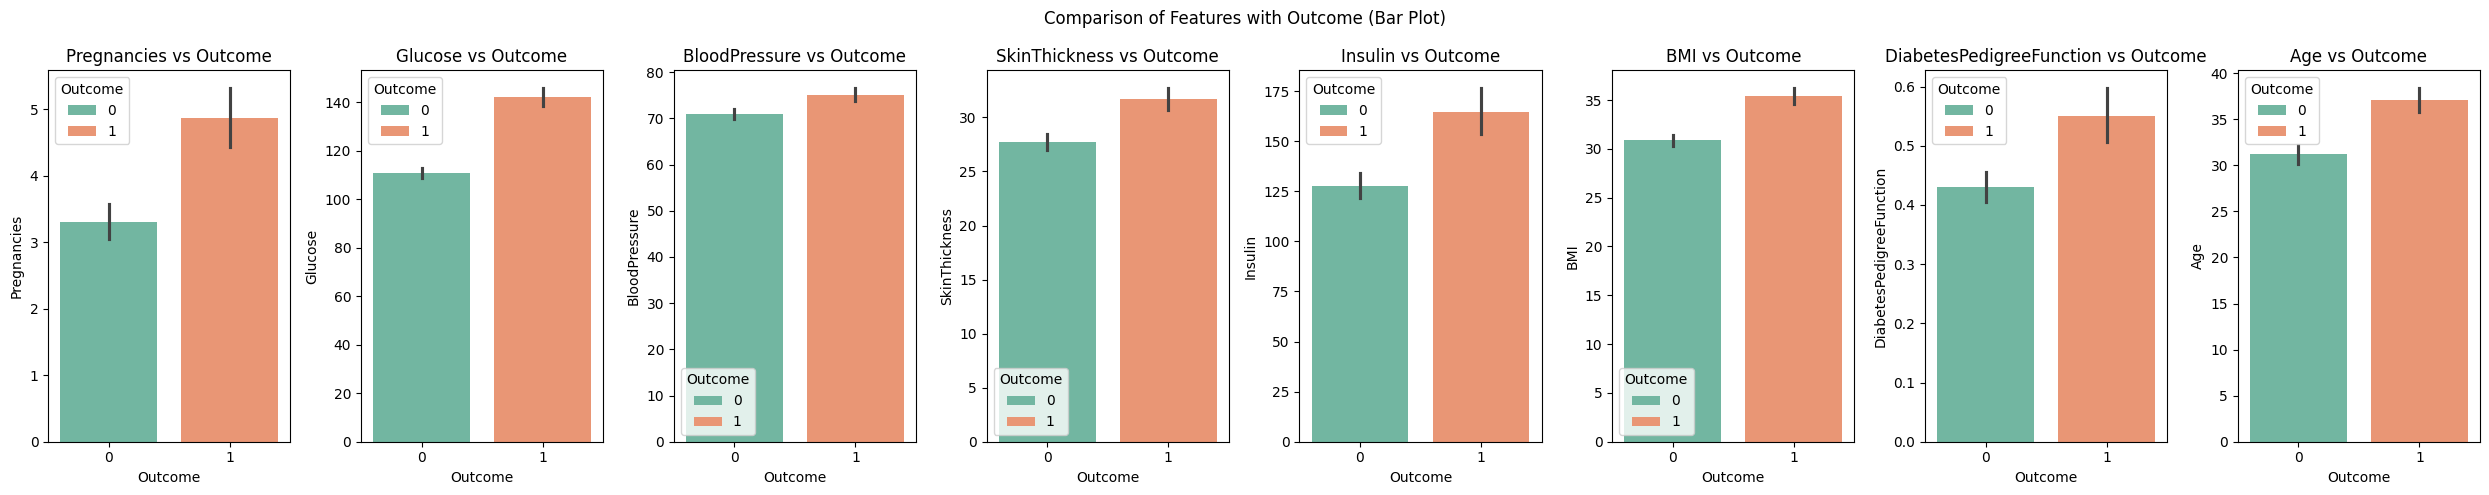

In [ ]:
fig, axes = plt.subplots(1, 8, figsize=(25, 5))
for i, feature in enumerate(data.columns[:-1]):
 sns.barplot(x=data['Outcome'], y=data[feature],
hue=data['Outcome'], ax=axes[i], palette="Set2")
 axes[i].set_title(f'{feature} vs Outcome')
 axes[i].set_xlabel('Outcome')
 axes[i].set_ylabel(feature)
plt.suptitle("Comparison of Features with Outcome (Bar Plot)")
plt.tight_layout()
plt.show()

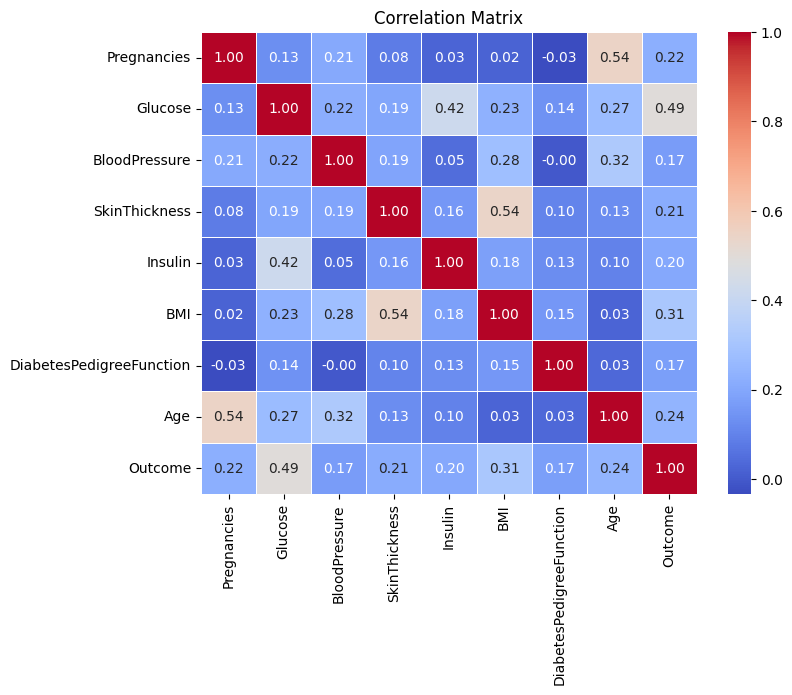

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig("Correlation.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

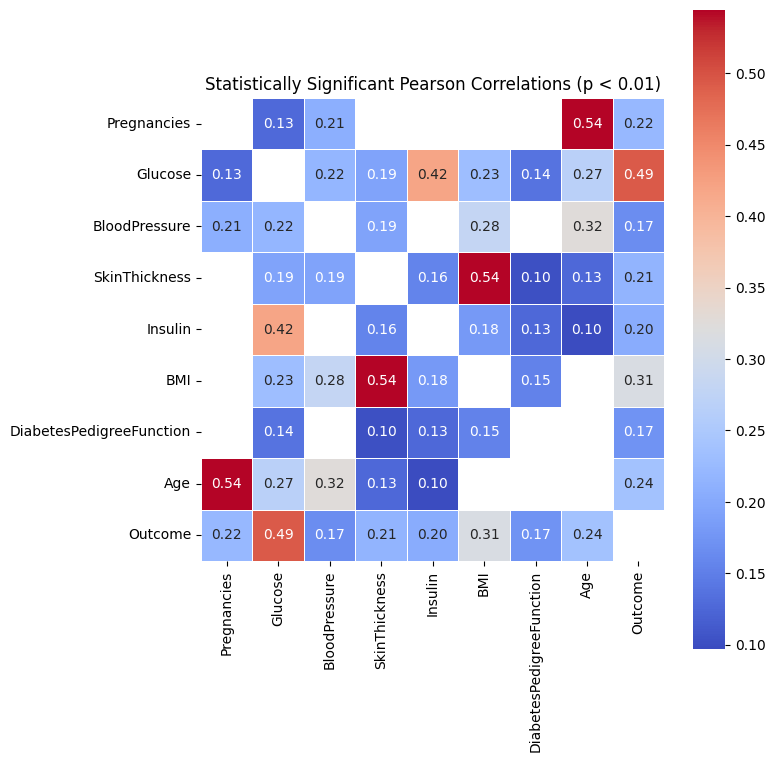

In [ ]:
# use pearson coefficient correlation
from scipy.stats import pearsonr

cols = data.columns
n = len(cols)
corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)

for i in range(n):
    for j in range(n):
        if i != j:
            r, p = pearsonr(data[cols[i]], data[cols[j]])
            corr_matrix.iloc[i, j] = r
            pval_matrix.iloc[i, j] = p

significance_mask = pval_matrix < 0.01
significant_corrs = corr_matrix.where(significance_mask)

np.fill_diagonal(significant_corrs.values, np.nan)

plt.figure(figsize=(8, 8))
sns.heatmap(significant_corrs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, mask=~significance_mask)
plt.title("Statistically Significant Pearson Correlations (p < 0.01)")
plt.savefig("Statistically significant Pearson Correlation", dpi=300, bbox_inches = "tight")
plt.tight_layout()
plt.show()

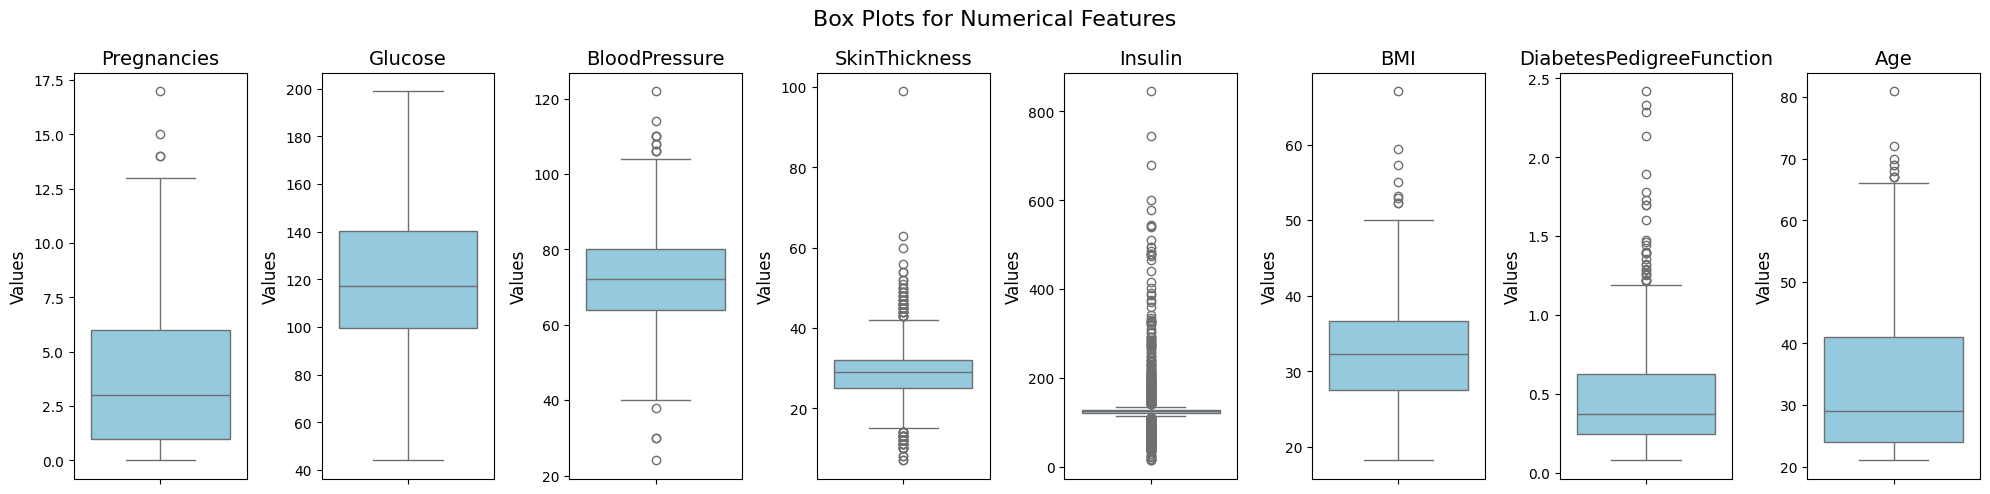

In [ ]:
features = data.columns[:-1]
num_features = len(features)

fig, axes = plt.subplots(1, num_features, figsize=(20, 5))

for i, column in enumerate(features):
    sns.boxplot(y=data[column], ax=axes[i], color="skyblue")
    axes[i].set_title(column, fontsize=14)
    axes[i].set_ylabel("Values", fontsize=12)

plt.suptitle("Box Plots for Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

Mutual Information (MI): This measured the non-linear dependency between each feature and the Outcome. Unlike correlation, MI is a non-parametric method that quantifies the reduction in uncertainty about the target variable given the feature's value, allowing it to detect complex relationships that simple linearity tests miss.

                    Feature  Mutual_Information
1                   Glucose            0.117733
5                       BMI            0.081040
0               Pregnancies            0.060985
7                       Age            0.051395
6  DiabetesPedigreeFunction            0.014590
4                   Insulin            0.012804
3             SkinThickness            0.012372
2             BloodPressure            0.001763


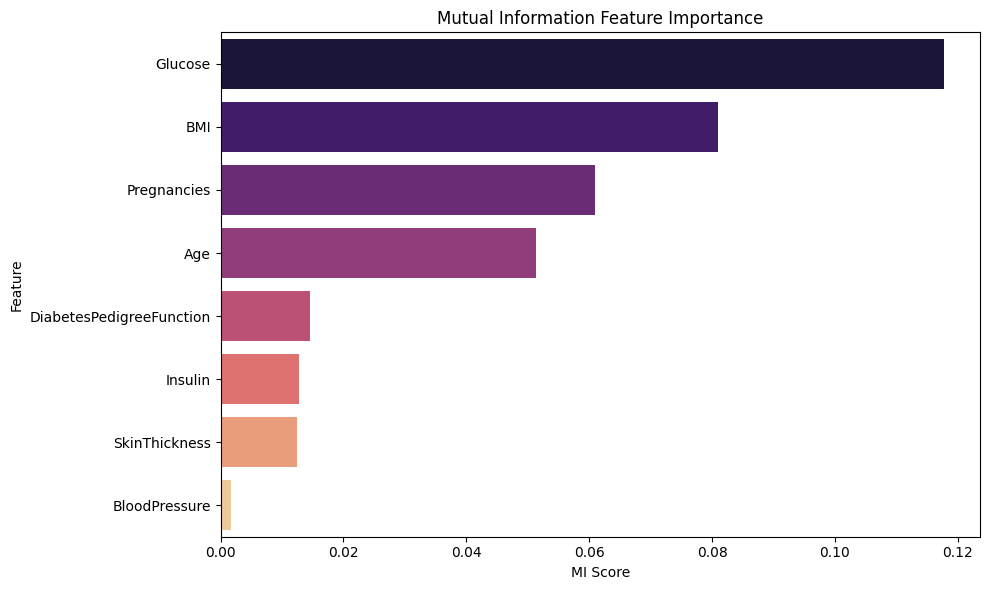

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = data.drop('Outcome', axis=1)
y = data['Outcome']

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print(mi_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='Mutual_Information', y='Feature', palette='magma',
            hue='Feature',
            legend=False)
plt.title('Mutual Information Feature Importance')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Pearson Correlation Coefficient ($r$): This measured the strength and direction of the linear relationship between each feature and the binary Outcome. It provided a clear, traditional view of direct dependency.

                    Feature  Pearson_Correlation       P_Value  \
1                   Glucose             0.492782  3.128719e-48   
5                       BMI             0.312038  8.336903e-19   
7                       Age             0.238356  2.209975e-11   
0               Pregnancies             0.221898  5.065127e-10   
3             SkinThickness             0.214873  1.793958e-09   
4                   Insulin             0.203790  1.210026e-08   
6  DiabetesPedigreeFunction             0.173844  1.254607e-06   
2             BloodPressure             0.165723  3.890835e-06   

   Absolute_Correlation  
1              0.492782  
5              0.312038  
7              0.238356  
0              0.221898  
3              0.214873  
4              0.203790  
6              0.173844  
2              0.165723  


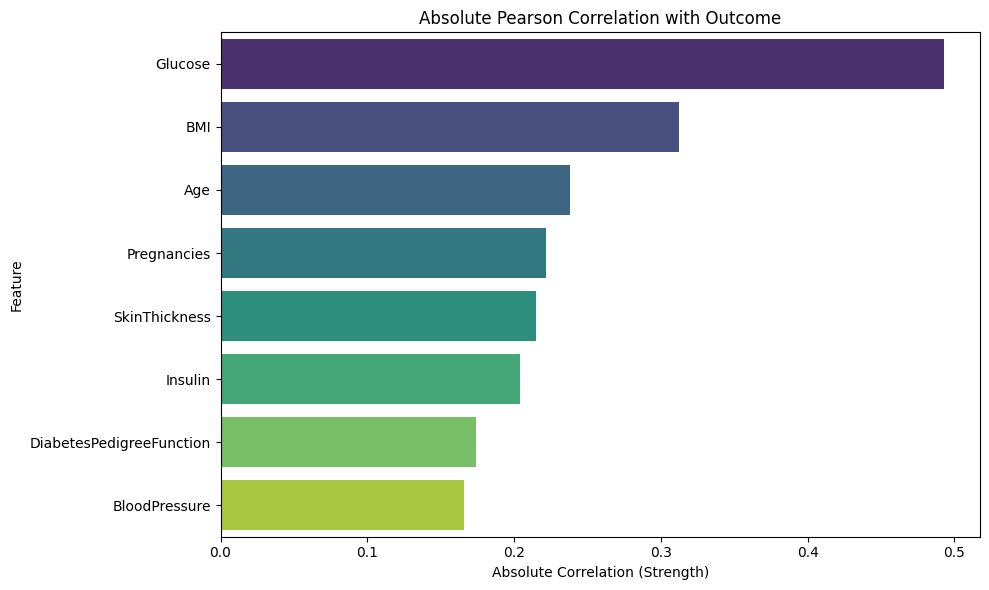

In [ ]:
from scipy.stats import pearsonr
target = 'Outcome'
feature_cols = data.columns.drop(target)

correlations = []
p_values = []

for feature in feature_cols:
    r, p = pearsonr(data[feature], data[target])
    correlations.append(r)
    p_values.append(p)

corr_df = pd.DataFrame({
    'Feature': feature_cols,
    'Pearson_Correlation': correlations,
    'P_Value': p_values,
    'Absolute_Correlation': np.abs(correlations)
}).sort_values(by='Absolute_Correlation', ascending=False)

print(corr_df)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=corr_df,
    x='Absolute_Correlation',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title('Absolute Pearson Correlation with Outcome')
plt.xlabel('Absolute Correlation (Strength)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Combined and scaled the two scores of Mutual Information and Pearson correlation by calculating the average.

,Feature,MI_Score,PC_Score,MI_Scaled,PC_Scaled,Combined_Score
1,Glucose,0.117733,0.492782,1.000000,1.000000,1.000000
5,BMI,0.081040,0.312038,0.683602,0.447366,0.565484
0,Pregnancies,0.060985,0.221898,0.510665,0.171758,0.341212
7,Age,0.051395,0.238356,0.427975,0.222079,0.325027
3,SkinThickness,0.012372,0.214873,0.091478,0.150279,0.120878
4,Insulin,0.012804,0.203790,0.095208,0.116393,0.105800
6,DiabetesPedigreeFunction,0.014590,0.173844,0.110605,0.024831,0.067718
2,BloodPressure,0.001763,0.165723,0.000000,0.000000,0.000000


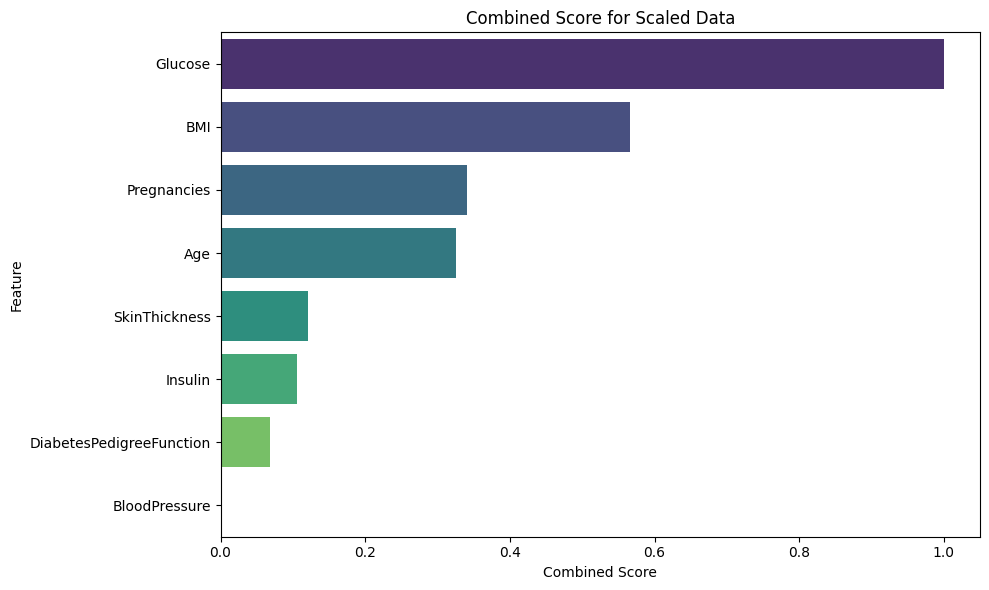

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('Outcome', axis=1)
y = data['Outcome']


#storing mutual importance and Pearson scores in matrices to perform Numpy operations
#previously they were stored in pandas dataframes, which were not suitable for scaling
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
pc_scores = [abs(pearsonr(X[col], y)[0]) for col in X.columns]

scaler = MinMaxScaler()
mi_scaled = scaler.fit_transform(np.array(mi_scores).reshape(-1, 1)).flatten()
pc_scaled = scaler.fit_transform(np.array(pc_scores).reshape(-1, 1)).flatten()

# equal weight, without assuming complex relationships
combined_score = (mi_scaled + pc_scaled) / 2

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores,
    'PC_Score': pc_scores,
    'MI_Scaled': mi_scaled,
    'PC_Scaled': pc_scaled,
    'Combined_Score': combined_score
}).sort_values(by='Combined_Score', ascending=False)

display(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x='Combined_Score',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title('Combined Score for Scaled Data')
plt.xlabel('Combined Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
#splitting the data ensures we can test the model on unseen data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]

accuracy_log = accuracy_score(y_test, y_pred_log)
auc_roc_log = roc_auc_score(y_test, y_probs_log)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"AUC-ROC: {auc_roc_log:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.7078
AUC-ROC: 0.8130
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



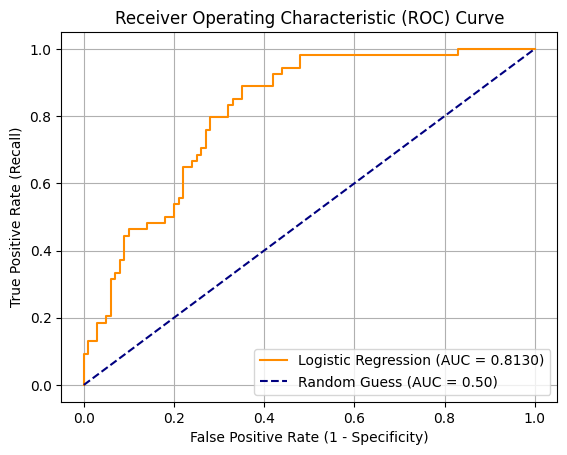

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_log)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_roc_log:.4f})', color='darkorange')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("Logistic_Regression_ROC_AUC.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#define the parameter grid for hyperparameter tuning
#Regularization parameter, gamma: Kernel coefficient
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}

grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',  # Optimize for AUC-ROC
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_

y_pred_svm = best_svm.predict(X_test_scaled)
y_probs_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_roc_svm = roc_auc_score(y_test, y_probs_svm)

print("\nSupport Vector Machine (SVM) Results:")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"AUC-ROC: {auc_roc_svm:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7338
AUC-ROC: 0.7893
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.70      0.43      0.53        54

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154



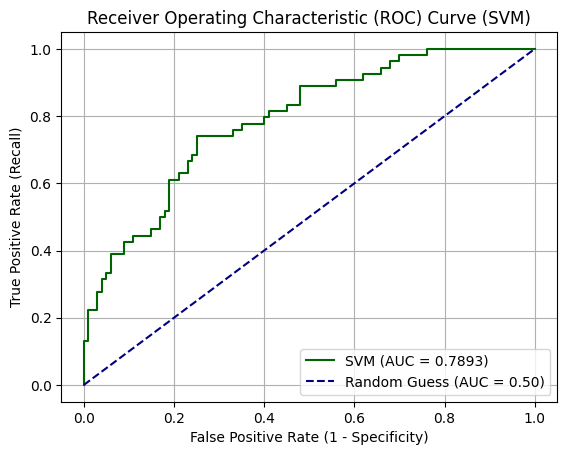

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svm)

plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_roc_svm:.4f})', color='darkgreen')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("SVM_ROC_AUC.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators=200 is the number of trees; class_weight='balanced' adjusts for imbalance
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_probs_rf)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_roc_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Results:
Accuracy: 0.7403
AUC-ROC: 0.8146
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



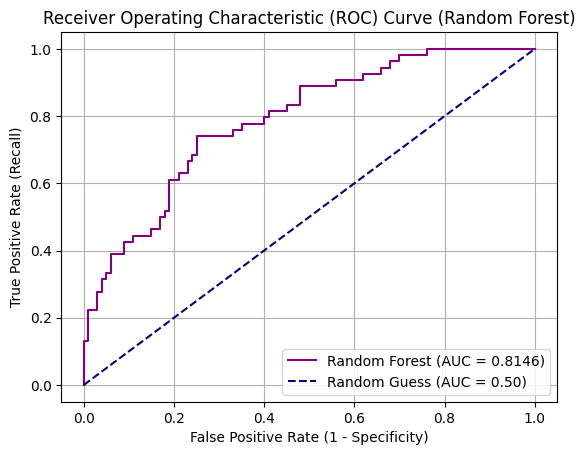

In [ ]:
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_roc_rf:.4f})', color='purple')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb

# we set 'use_label_encoder=False' and 'eval_metric' to silence warnings and ensure proper setup
# 'scale_pos_weight' is used to handle class imbalance (ratio of negative to positive cases)
pos_count = y_train.sum()
neg_count = len(y_train) - pos_count
scale_pos_weight_value = neg_count / pos_count

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    n_estimators=100,             # number of boosting rounds (trees)
    learning_rate=0.1,            # step size shrinkage to prevent overfitting
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value, # adjust class imbalance
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class (1)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_roc_xgb = roc_auc_score(y_test, y_probs_xgb)

print("\nXGBoost Classifier Results:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"AUC-ROC: {auc_roc_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classifier Results:
Accuracy: 0.7468
AUC-ROC: 0.8220
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



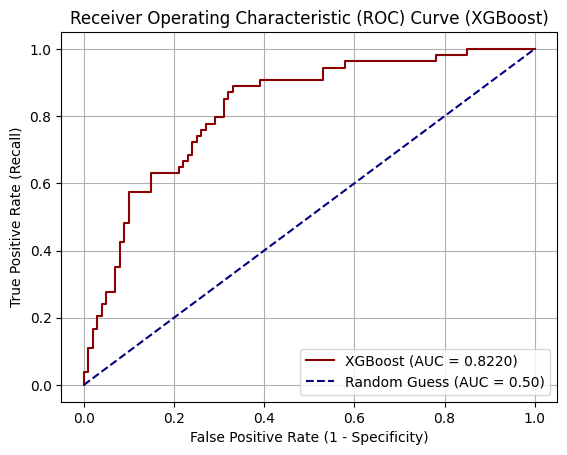

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)

plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_roc_xgb:.4f})', color='darkred')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

RFE successfully validated 4 key features important to achieve optimal or near-optimal performance. This outcome is highly valuable, as it allows us to build simplified, faster, and more robust models that generalize better to unseen data while requiring fewer clinical inputs.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_estimator = LogisticRegression(random_state=42)
rfe_selector = RFE(rfe_estimator, n_features_to_select=4, step=1)

rfe_selector.fit(X_train_scaled, y_train)

selected_feature_indices = rfe_selector.support_
selected_feature_names = X.columns[selected_feature_indices].tolist()

print("--- RFE Selection Results ---")
print(f"Top 4 Features Selected: {selected_feature_names}")

--- RFE Selection Results ---
Top 4 Features Selected: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


In [ ]:
X_train_rfe = X_train_scaled[:, selected_feature_indices]
X_test_rfe = X_test_scaled[:, selected_feature_indices]

#MODEL RETRAINING AND EVALUATION

from sklearn.model_selection import RandomizedSearchCV

results_rfe = {}
models_to_test = {
    'Logistic Regression (RFE)': LogisticRegression(random_state=42),

    # Random Forest with RandomizedSearchCV
    'Random Forest (RFE)': RandomizedSearchCV(
        RandomForestClassifier(random_state=42, class_weight='balanced'),
        {
            'n_estimators': [100, 200, 500],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        },
        n_iter=30,  # number of random parameter settings to try
        cv=5, scoring='roc_auc', n_jobs=-1, random_state=42
    ),

    # SVM (already tuned with GridSearchCV)
    'SVM (Tuned, RFE)': GridSearchCV(
        SVC(probability=True, random_state=42),
        {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
        cv=5, scoring='roc_auc', n_jobs=-1
    ),

    # XGBoost with RandomizedSearchCV
    'XGBoost (RFE)': RandomizedSearchCV(
        xgb.XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),
            random_state=42,
        ),
        {
            'n_estimators': [100, 200, 500],
            'max_depth': [3, 5, 7, 10],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0],
            'colsample_bytree': [0.7, 0.8, 1.0]
        },
        n_iter=30,  # only test 30 random combos
        cv=5, scoring='roc_auc', n_jobs=-1, random_state=42
    )
}

In [ ]:
print("\n" + "="*50)
print("RETRAINING MODELS WITH TOP 4 RFE FEATURES")
print("="*50)

for name, model in models_to_test.items():
    print(f"\nTraining {name}...")

    model.fit(X_train_rfe, y_train)

    if isinstance(model, GridSearchCV):
        best_model = model.best_estimator_
    else:
        best_model = model

    y_probs = best_model.predict_proba(X_test_rfe)[:, 1]
    y_pred = best_model.predict(X_test_rfe)

    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_probs)
    report = classification_report(y_test, y_pred, output_dict=True)

    results_rfe[name] = {
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc,
        'Recall_Class1': report['1']['recall']
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}")
    print(f"  Recall (Diabetes): {report['1']['recall']:.4f}")


RETRAINING MODELS WITH TOP 4 RFE FEATURES

Training Logistic Regression (RFE)...
  Accuracy: 0.6948
  AUC-ROC: 0.8107
  Recall (Diabetes): 0.5000

Training Random Forest (RFE)...
  Accuracy: 0.7208
  AUC-ROC: 0.8143
  Recall (Diabetes): 0.7037

Training SVM (Tuned, RFE)...
  Accuracy: 0.7143
  AUC-ROC: 0.7765
  Recall (Diabetes): 0.4630

Training XGBoost (RFE)...
  Accuracy: 0.7338
  AUC-ROC: 0.8139
  Recall (Diabetes): 0.7407


In [ ]:
final_df = pd.DataFrame(results_rfe).T
final_df = final_df.sort_values(by='AUC-ROC', ascending=False)

print("\n" + "="*50)
print("PERFORMANCE SUMMARY (TOP 4 RFE FEATURES ONLY)")
print("="*50)
print(final_df.to_markdown(floatfmt=".4f"))


PERFORMANCE SUMMARY (TOP 4 RFE FEATURES ONLY)
|                           |   Accuracy |   AUC-ROC |   Recall_Class1 |
|:--------------------------|-----------:|----------:|----------------:|
| Random Forest (RFE)       |     0.7208 |    0.8143 |          0.7037 |
| XGBoost (RFE)             |     0.7338 |    0.8139 |          0.7407 |
| Logistic Regression (RFE) |     0.6948 |    0.8107 |          0.5000 |
| SVM (Tuned, RFE)          |     0.7143 |    0.7765 |          0.4630 |


Taking XGBoost Classifier (RFE) (due to its high Recall), and the scaled training data

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
# Import other libraries needed for your model (e.g., specific kernel for SVM)

# --- 1. Load Data and Apply Cleaning/RFE ---
# (You need to recreate the exact data and feature selection process)
data = pd.read_csv("diabetes.csv")

# Impute 0s with the median (This must match your final notebook logic!)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, data[col].median())

# Define the 4 RFE-selected features
rfe_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']

X = data[rfe_features]
y = data['Outcome']

# Split data (important for fitting the scaler ONLY on the training data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Fit and Save the StandardScaler ---
# The scaler must be fit ONLY on the training data (X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler_rfe_4.joblib')

# --- 3. Train and Save the Champion Model (XGBoost) ---
# Use the same parameters as your final, best model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=2.0, # Example value based on class imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
joblib.dump(xgb_model, 'xgb_rfe_model.joblib')

print("Model and Scaler successfully saved to disk.")


Model and Scaler successfully saved to disk.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:58:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
!pip install streamlit pandas joblib xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler # Must import the class type

# --- 1. Load Saved Assets (Model and Scaler) ---
# We use st.cache_resource to load these large files only once, speeding up the app.
@st.cache_resource
def load_assets():
    try:
        # Load the fitted StandardScaler and the champion XGBoost model
        scaler = joblib.load('scaler_rfe_4.joblib')
        model = joblib.load('xgb_rfe_model.joblib')
        return scaler, model
    except FileNotFoundError:
        st.error("Model or Scaler file not found. Please ensure 'scaler_rfe_4.joblib' and 'xgb_rfe_model.joblib' are in the same directory.")
        return None, None

scaler, model = load_assets()

# --- 2. User Interface Setup ---

st.set_page_config(
    page_title="Pima Diabetes Predictor MVP",
    layout="centered",
    initial_sidebar_state="collapsed"
)

st.title("🩺 Pima Diabetes Risk Predictor (MVP)")
st.markdown("This tool uses your optimized **XGBoost model**, trained on only the **Top 4 RFE-selected features**, to estimate the risk of Type 2 Diabetes.")
st.markdown("---")

if model is not None:
    # --- 3. Input Fields for 4 RFE Features ---
    st.subheader("Input Patient Vitals")
    st.markdown("Please enter the patient's data below.")

    # Use two columns for better layout and responsiveness
    col1, col2 = st.columns(2)

    with col1:
        glucose = st.number_input(
            "Glucose (mg/dL):",
            min_value=40.0,
            max_value=200.0,
            value=120.0,
            step=1.0,
            help="Plasma glucose concentration in a 2-hour oral glucose tolerance test."
        )

        age = st.number_input(
            "Age (Years):",
            min_value=21,
            max_value=100,
            value=30,
            step=1
        )

    with col2:
        bmi = st.number_input(
            "BMI (Body Mass Index):",
            min_value=10.0,
            max_value=70.0,
            value=30.0,
            step=0.1,
            help="Weight in kg divided by height squared in meters."
        )

        dpf = st.number_input(
            "Diabetes Pedigree Function (DPF):",
            min_value=0.08,
            max_value=2.5,
            value=0.37,
            step=0.01,
            format="%.3f",
            help="A synthesis of family history and genetic risk."
        )

    st.markdown("---")

    # --- 4. Prediction Logic ---

    # Button to trigger the prediction
    if st.button("Analyze Diabetes Risk", type="primary"):

        # 4a. Validate data structure
        # NOTE: Feature order MUST match the RFE training order: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
        input_data = np.array([glucose, bmi, age, dpf]).reshape(1, -1)

        # Apply the exact Standard Scaler saved earlier
        input_scaled = scaler.transform(input_data)

        # 4b. Make Prediction
        # Predict probability of class 1 (Diabetes)
        probability = model.predict_proba(input_scaled)[:, 1][0]
        risk_percentage = probability * 100

        # 4c. Interpret and Display Result

        st.subheader("Prediction Result")

        if probability >= 0.5:
            st.error("🔴 High Risk Detected")
            st.markdown(f"The model predicts a **{risk_percentage:.1f}% probability** of testing positive for Type 2 Diabetes.")
            st.warning("Immediate follow-up with a healthcare professional is strongly recommended.")
        else:
            st.success("🟢 Low Risk Detected")
            st.markdown(f"The model predicts a **{risk_percentage:.1f}% probability** of testing positive for Type 2 Diabetes.")
            st.info("The risk is low, but maintaining a healthy lifestyle is advised.")

        # --- 5. Display Technical Context ---
        st.markdown("---")
        with st.expander("Technical Details & RFE Features Used"):
            st.markdown("""
            **Model:** XGBoost Classifier (Optimized for Recall)
            **Features Used (RFE Top 4):** Glucose, BMI, Age, DPF
            """)
            st.code(f"""
Final Prediction Probability (P(Diabetes=1)): {probability:.4f}
""")
            st.markdown("*(The values were first scaled using the training set's Standard Scaler before being fed into the model.)*")


2025-10-24 07:04:37.062 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 07:04:37.826 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-24 07:04:37.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 07:04:37.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 07:04:37.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 07:04:37.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 07:04:37.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-24 07:04:37.863 Thread 'MainThread': mi